In [1]:
#!/usr/bin/env python
# coding: utf-8

import cv2 # The OpenCV library; install using `pip install opencv-contrib-python`
import numpy as np # Helpful when working with arrays; install using `pip install numpy`
from matplotlib import pyplot as plot # Good for graphing; install using `pip install matplotlib`
from matplotlib import image as image
import easygui # An easy-to-use file-picker; pip install easygui


In [34]:

# Video capture from a file:
Video = cv2.VideoCapture("../Films/Zorro.mp4")
length = int(Video.get(cv2.CAP_PROP_FRAME_COUNT))
(check, I) = Video.read()

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.mp4',fourcc,20.0,(480,640))

mean_brightness = np.zeros(length)
i = 0
while check:  
    G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
    G = G[0:480,110:750]
    brightness_values = G.ravel()
    mean_brightness[i] = sum(brightness_values)/len(brightness_values)
    #print(mean_brightness[i])
    #H = cv2.equalizeHist(G)
    text = "Brightness: " + str(round(mean_brightness[i]))
    position = (50,50)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (255,0,255)
    thickness = 2
    
    cv2.putText(G,text,position,font,font_scale,color,thickness)
    cv2.imshow("image", G)
    #cv2.imshow("equ", H)
    out.write(G)
    # This delays for 1ms while waiting for a key to be pressed
    key = cv2.waitKey(1)

    # if the 'q' keqy is pressed, quit:
    if key == ord("q"):
         break
    i += 1

    # Next Frame:
    (check, I) = Video.read()

Video.release()
out.release()
cv2.destroyAllWindows()


704


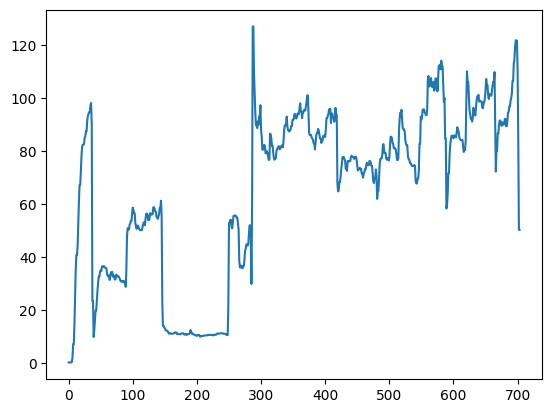

In [29]:
print(length)
plot.plot(mean_brightness)
#plot.hist(mean_brightness,bins=256,range=[0,length])
plot.show()

In [16]:
print(len(mean_brightness))

704
